### PROBLEMS WITH PERCEPTRON TRICK

Perceptron Trick works well for all practical purposes. But the problem is we could not quantify whether the obtained weights are the best weights for the problem or not.

Let's consider the same data again.

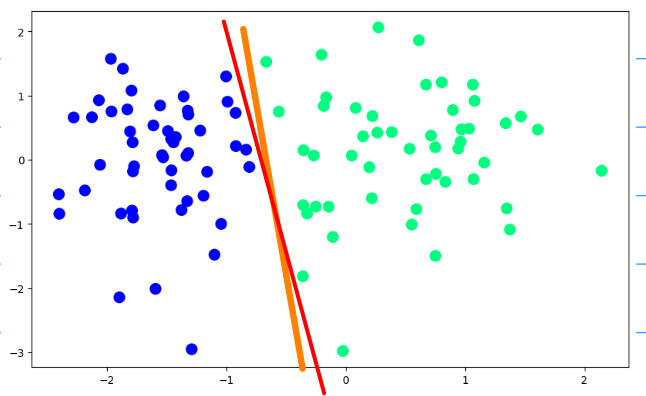

The Orange colored line is the weights that we have obtained using perceptron trick for classifiying the data. But we can see that there is always a Red colored line, that also classifies the data points correctly. How can we identify which is the line that best classifies these data points?

Second problem with Perceptron Trick is on the convergence part. Like we have discussed in the previous notebook, in Perceptron Trick we randomly choose 1000 data points and check whether the data points are correctly classified according to the line, if not we adjust the weights and bias and moves the line towards the point for correct classification.

Now in this method, there could be hypothetical scenario, where the points that are selected randomly could be the same points that have been previously selected and the line may not move towards correct classification

So, to avoid such kind of scenarios we use **Loss Functions**

#### LOSS FUNCTIONS

Loss Functions quantify the weights and biases that has been obtained and says whether they are the best solution for the problem or not

Loss Functions help us in identifying how good or bad our Machine Learning/Deep Learning Model works

In the case of Perceptron we can say that Loss Function is a function of *w1, w2 & b*

#### PERCEPTRON LOSS FUNCTION

In Perceptron loss function we find the magnitude of the distance of misclassified points from the line

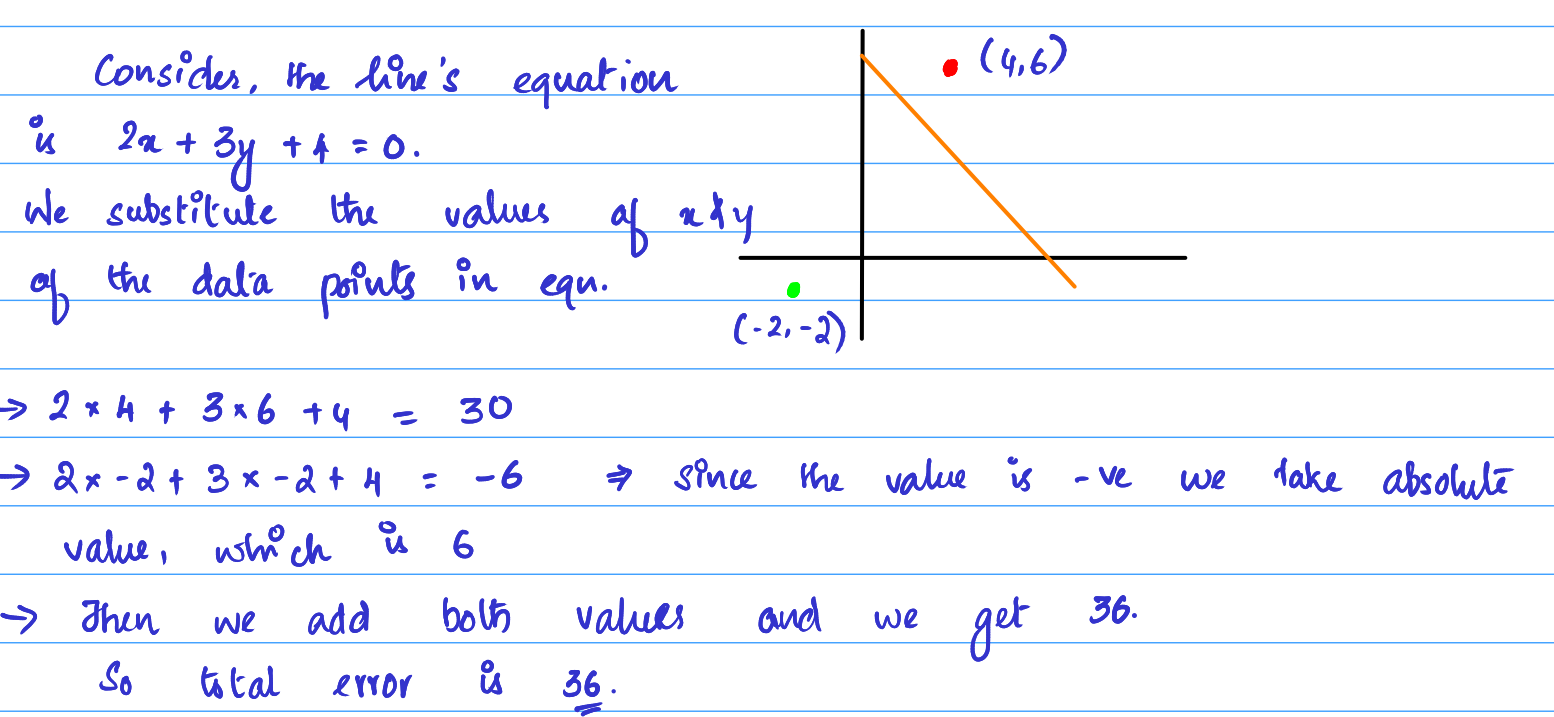

#### LOSS FUNCTION FROM SKLEARN

Consider we are using SGD Optimizer on our Perceptron. And when we use SGD Optimizer on Perceptron, then our Loss Function is:

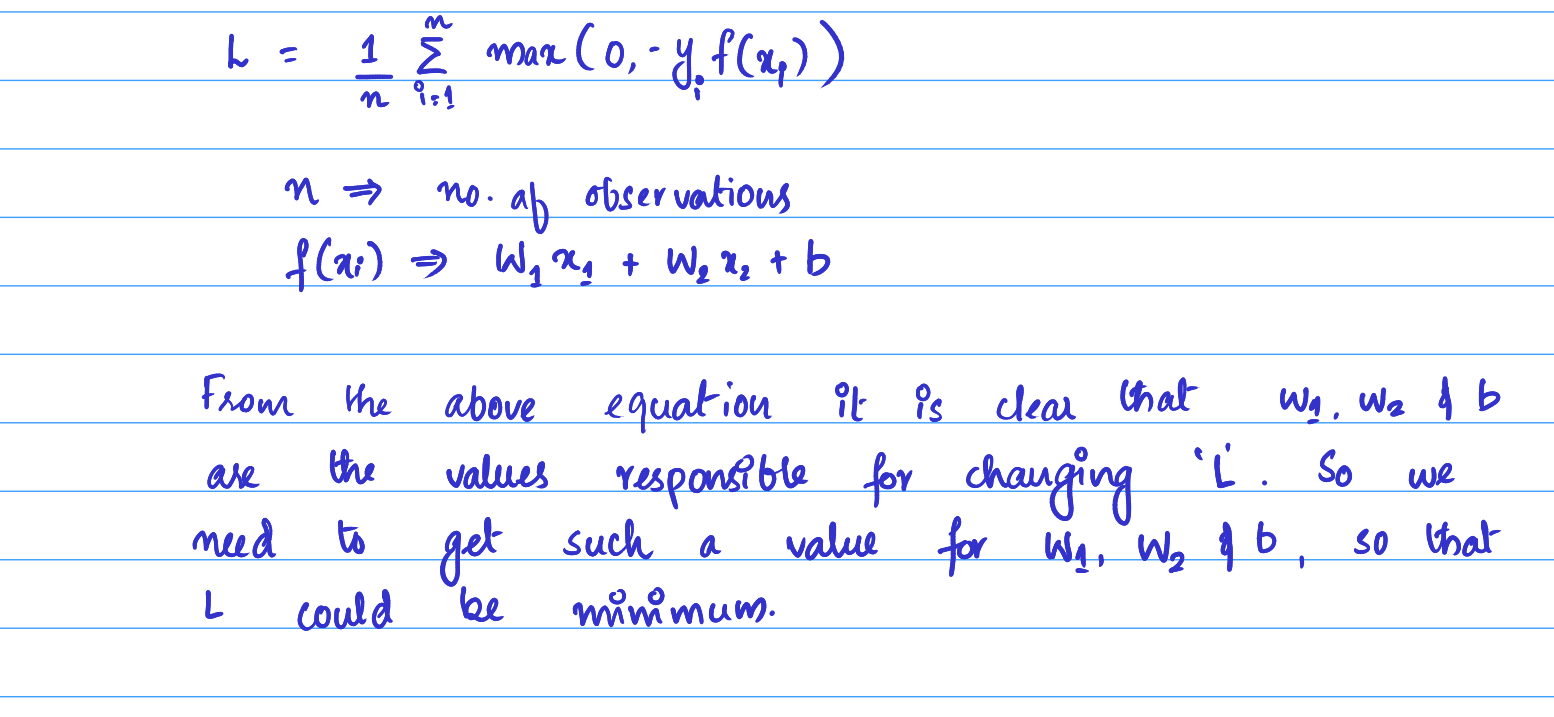

#### GEOMETRIC INTUITION OF LOSS FUNCTION

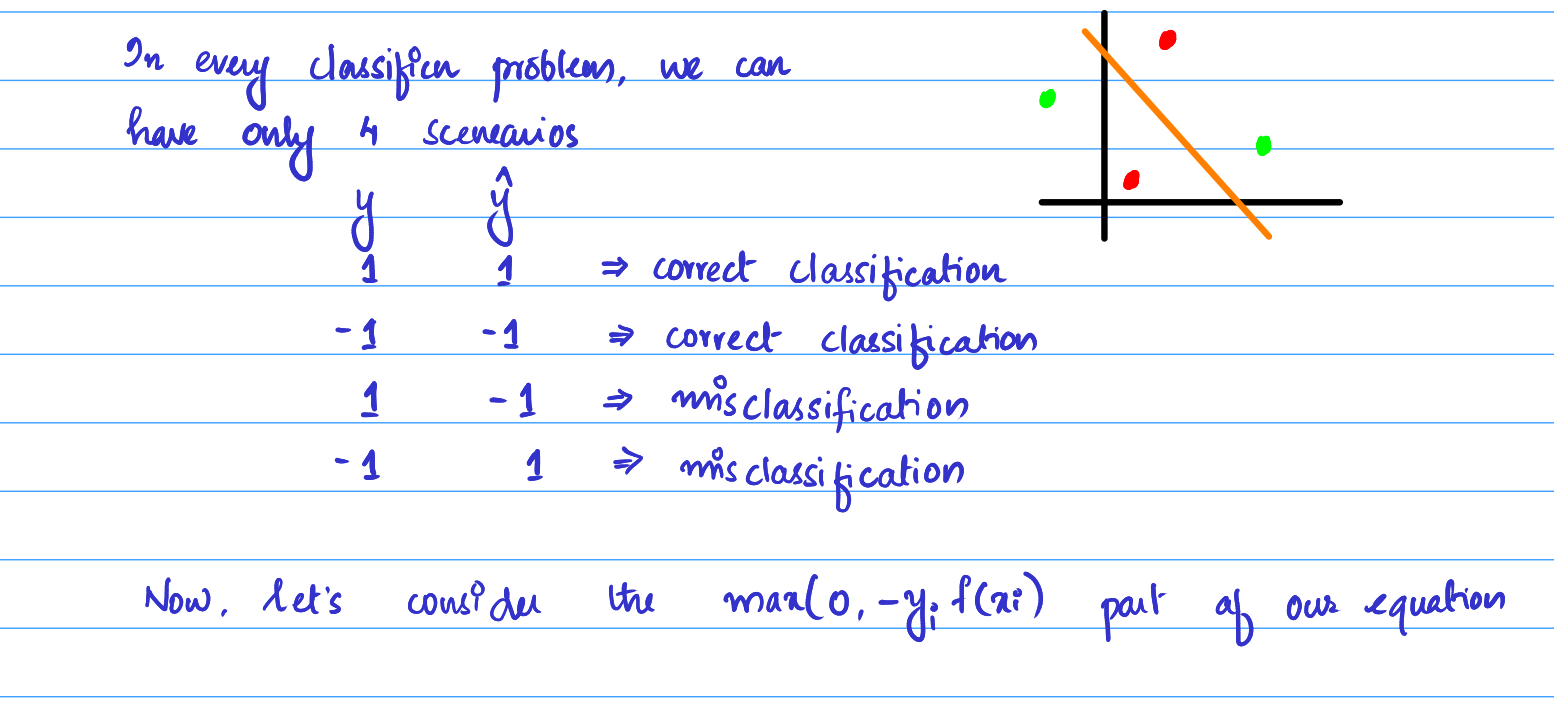

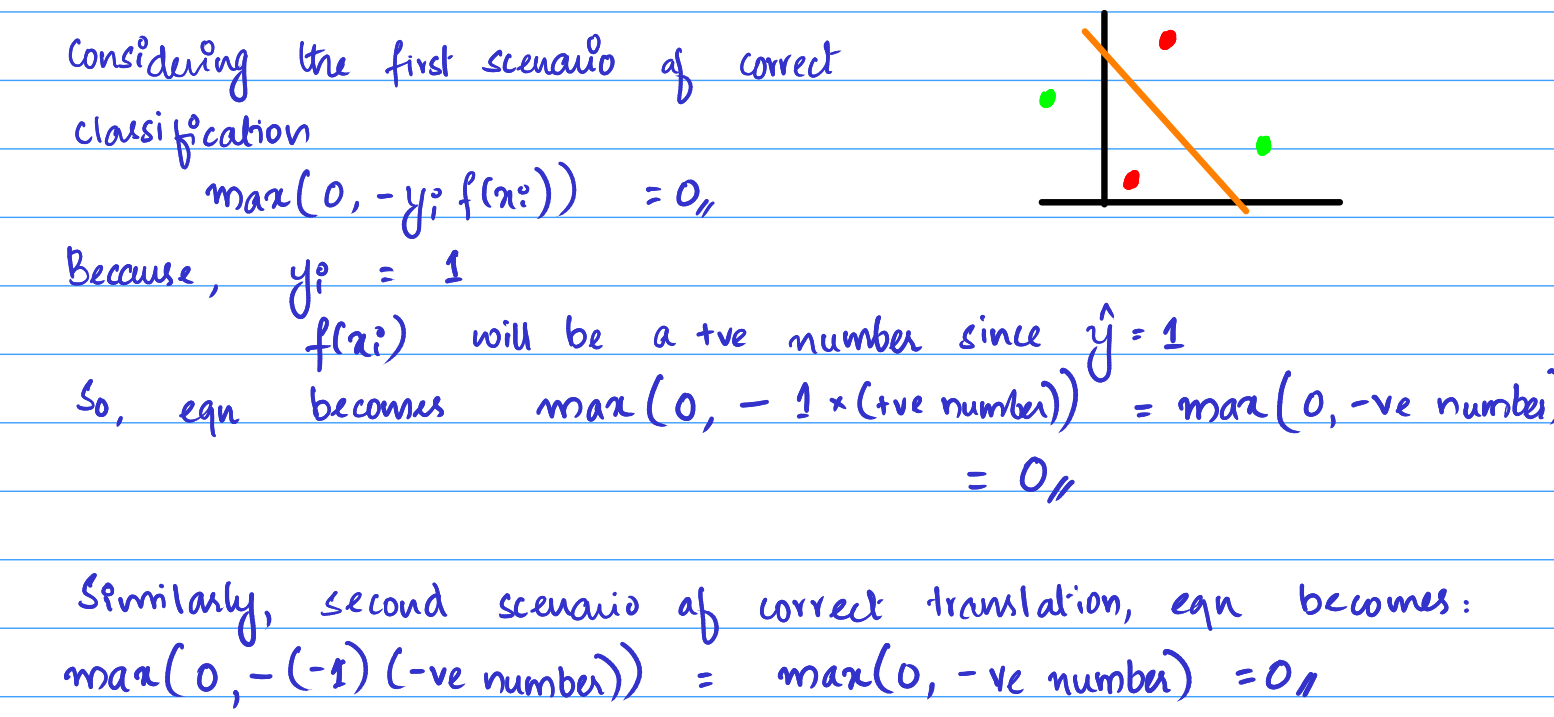

From the above scenarios we can say that, the correctly classified data points will not be contributing much to the error function.

Now let's consider the misclassified points

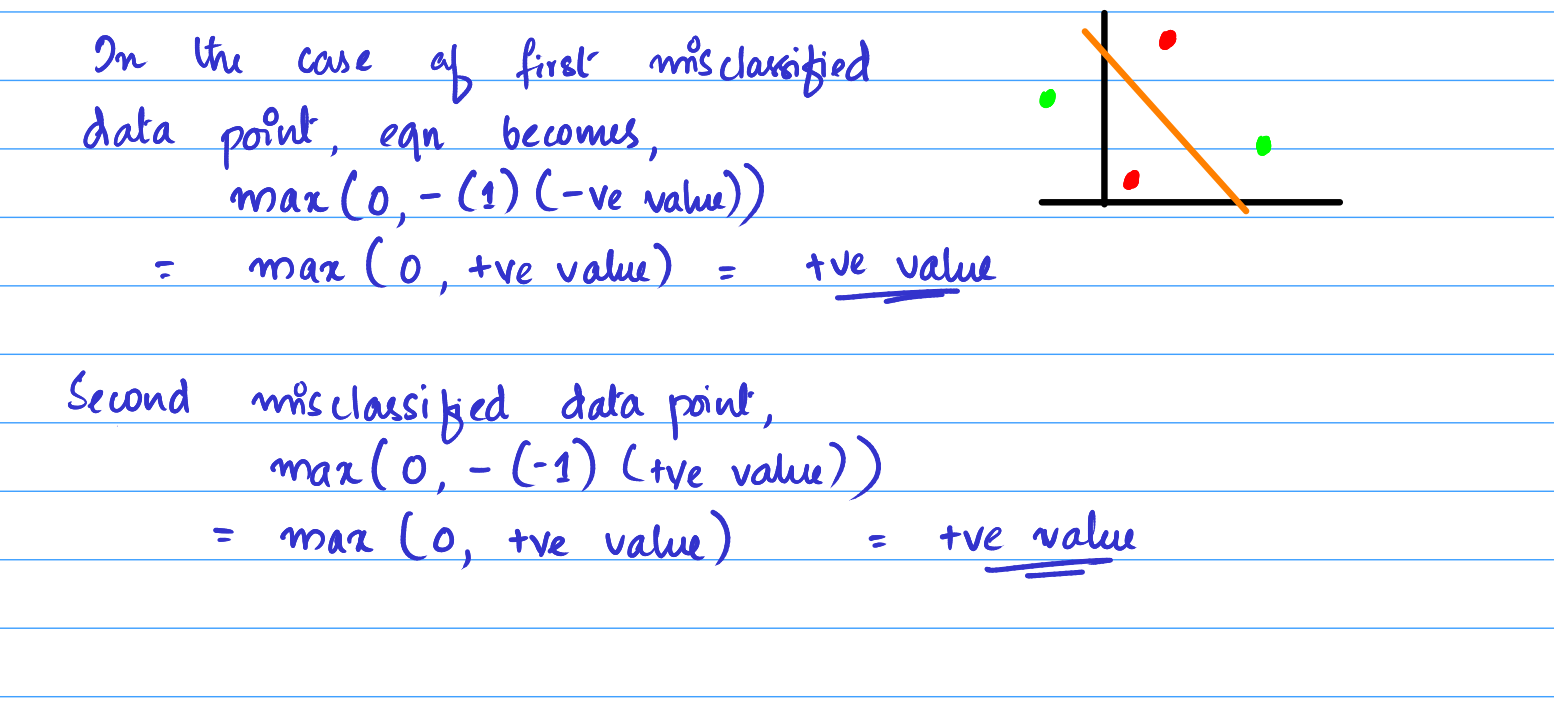

We see here, that the misclassified data points are contributing to the error function

So, this was the Geometric Intuition of the Loss Function. Now let's see how we can select values of w1,w2 & b, so that we could get a minimum value for our Loss Function

#### GRADIENT DESCENT

Gradient Descent is an Optimization Algorithm that helps in obtaining the values for w1, w2 & b, which could give the minimum value for Loss

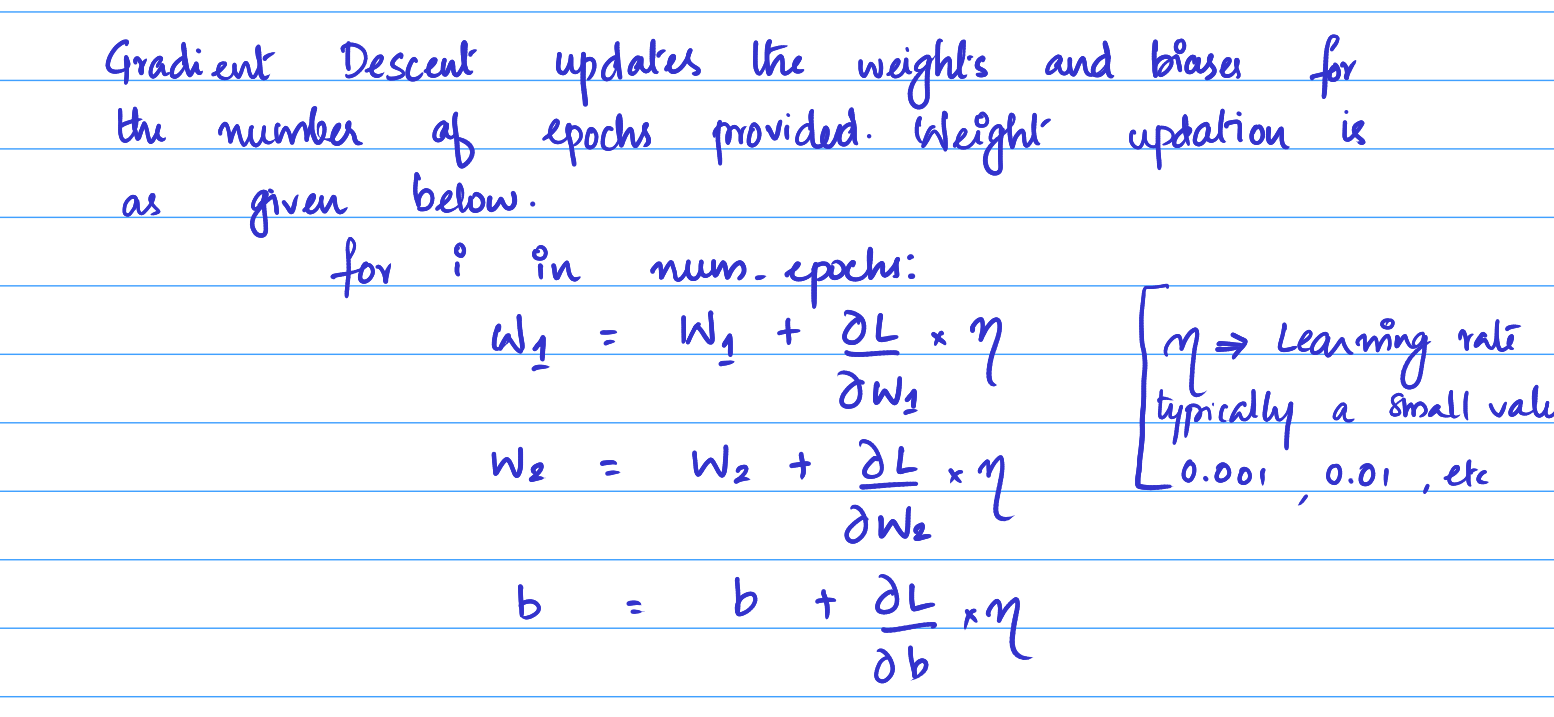

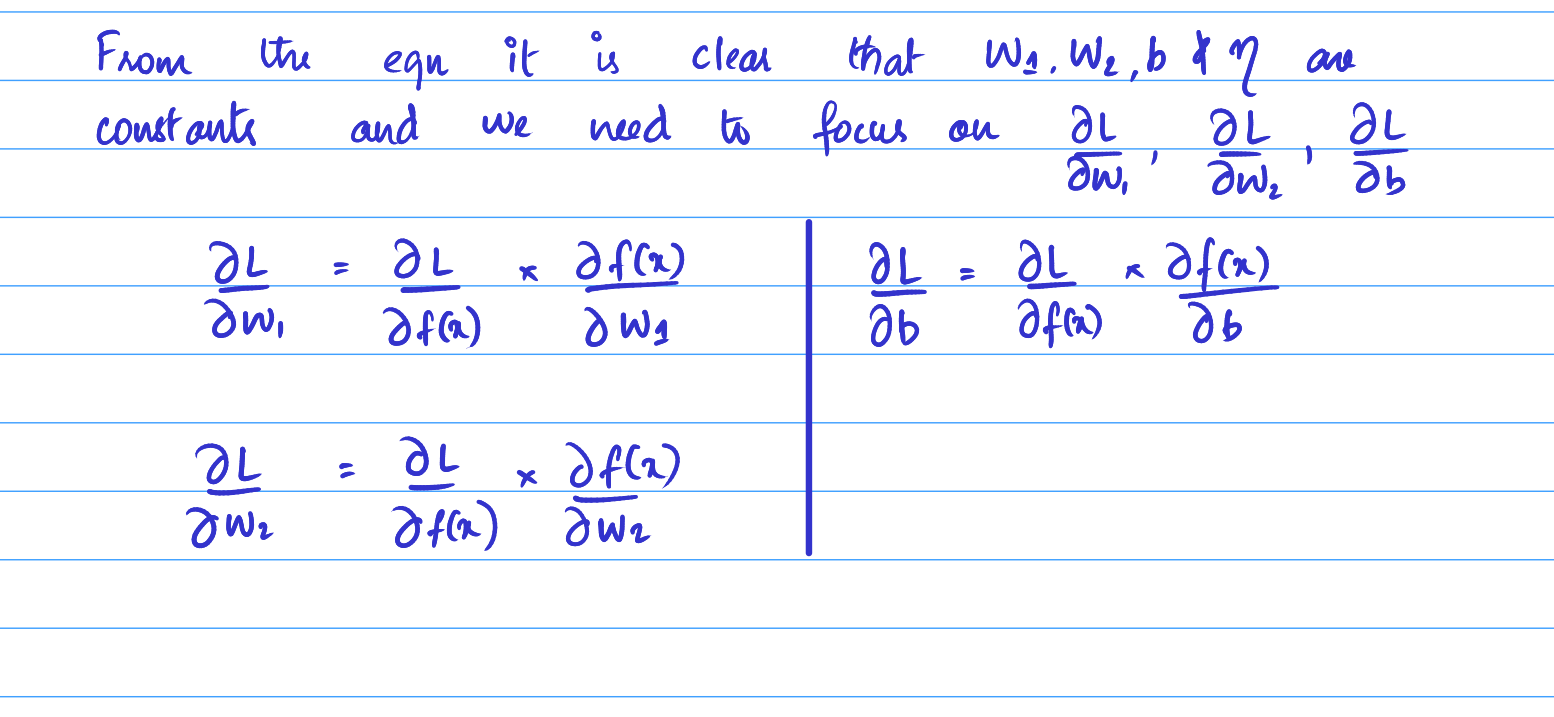

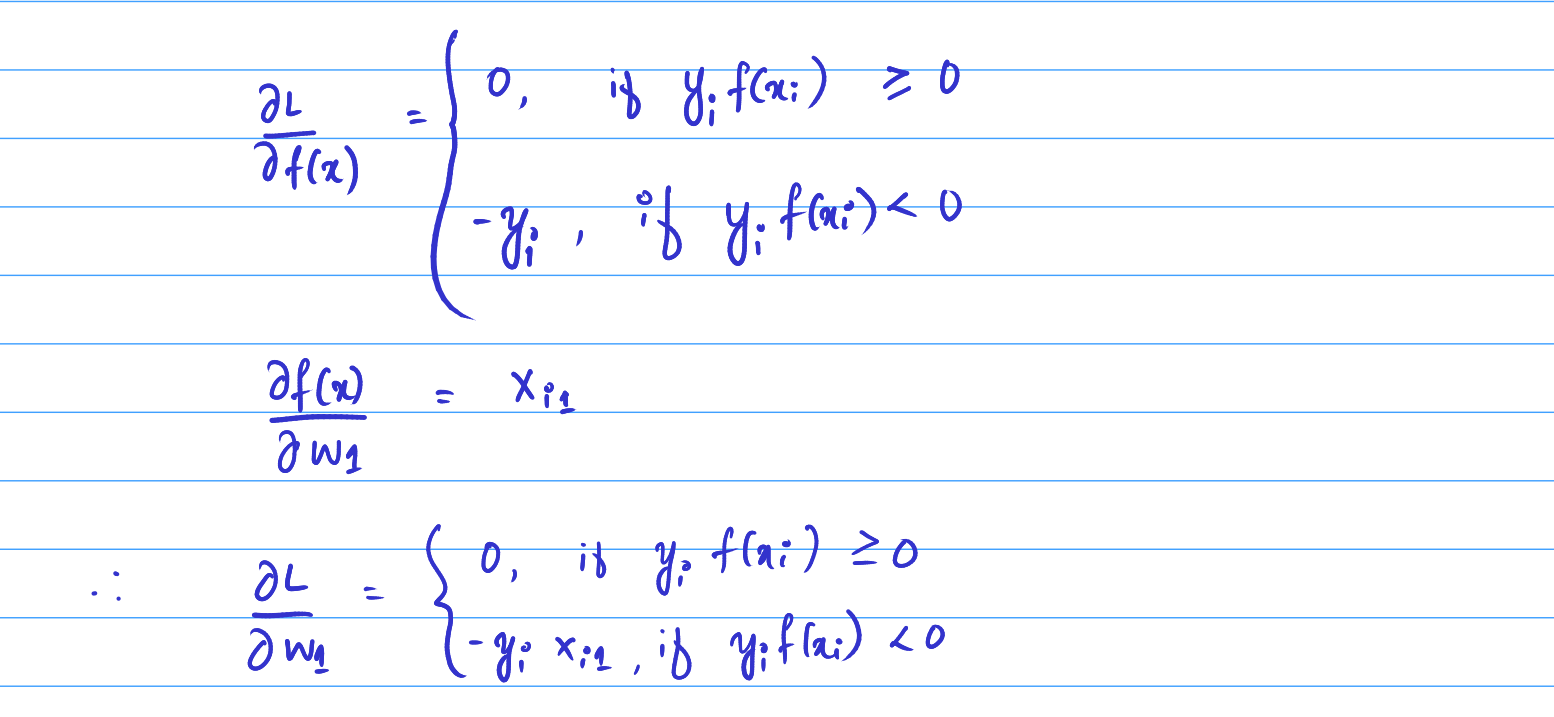

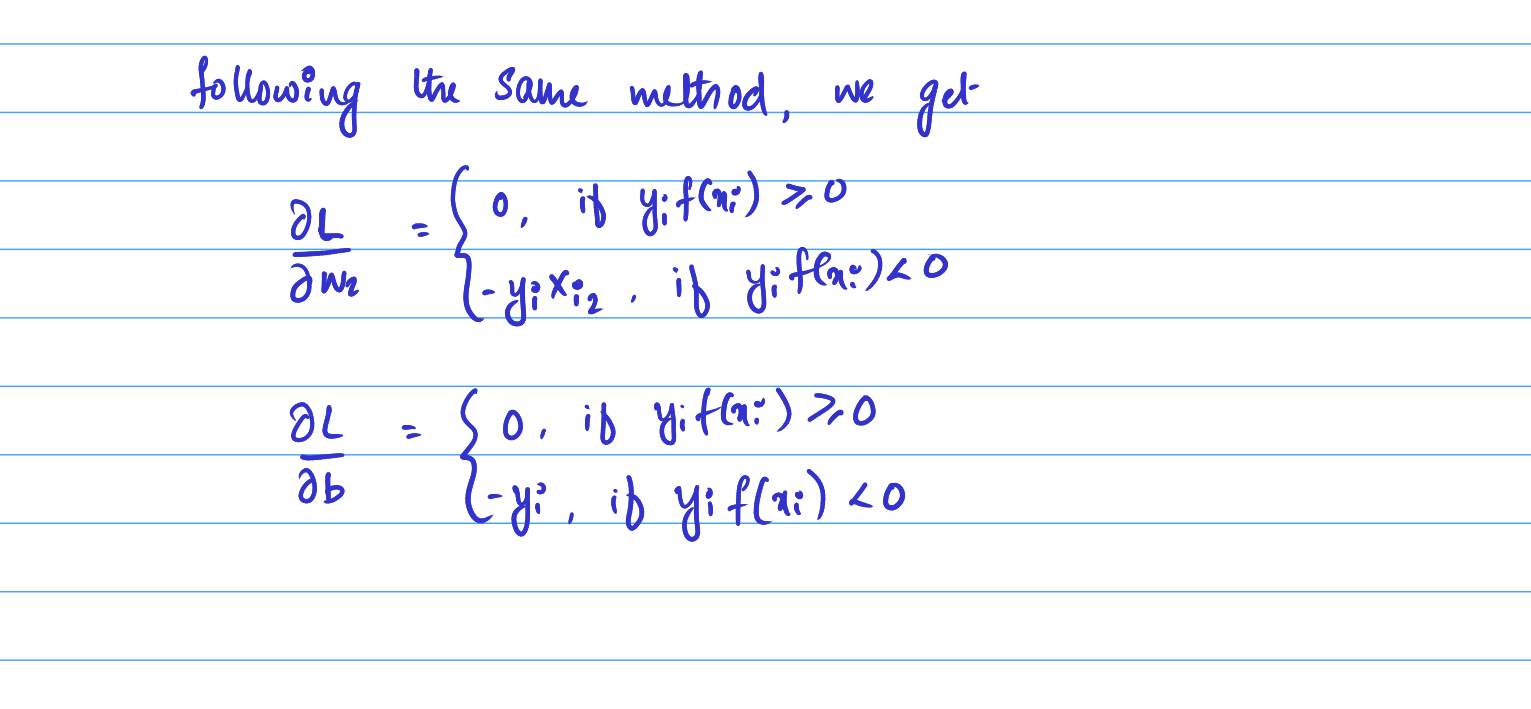

Now let's implement this algorithm through code

In [1]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=15)

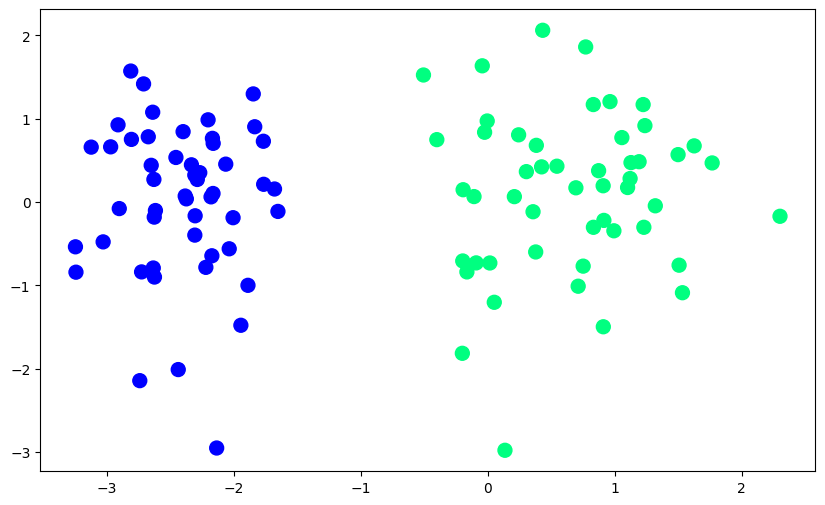

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

This is how our data looks like

In [11]:
#loss function with gradient descent optimization

def perceptron(X,y):
    
    w1 = w2 = b = 1 #initializing weights and bias as 1
    lr = 0.1 # initializing learning rate as 0.1
    
    epochs = 1000 #initializing epochs as 1000
    
    for i in range(epochs):
        
        for j in range(X.shape[0]):
            
            z = w1*X[j][0] + w2*X[j][1]+b
            
            if z*y[j] < 0:
                w1 = w1 + lr*y[j]*X[j][0]
                w2 = w2 + lr*y[j]*X[j][1]
                b = b + lr*y[j]
    
    return w1, w2, b
    

In [12]:
w1, w2, b = perceptron(X,y)

In [13]:
m = -(w1/w2)
c = -(b/w2)

In [14]:
print(m,c) 

-4.531321834268464 -5.851870329508209


(-3.0, 2.0)

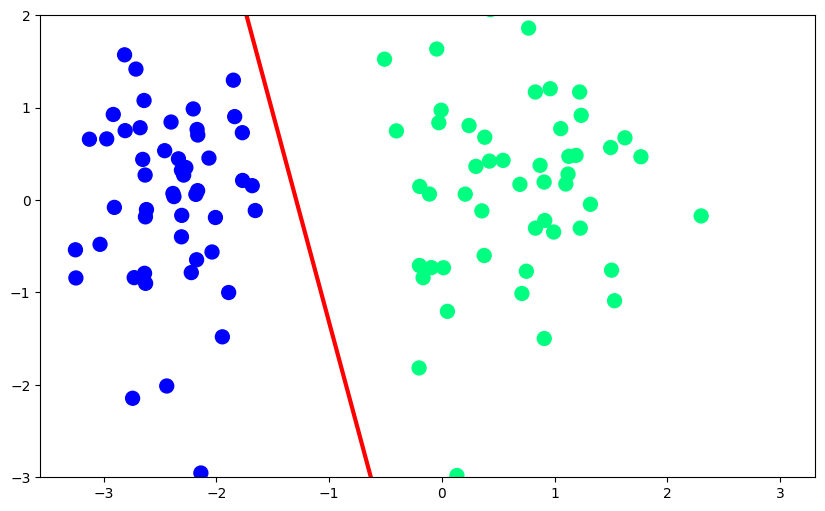

In [15]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + c

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)